In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [89]:
hit = pd.read_csv('Hitters.csv')
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df['Salary']
X_ = df.drop(['League', 'Division', 'NewLeague', 'Salary'], axis=1).astype('float')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [83]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [84]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

In [85]:
cart_model = DecisionTreeRegressor(max_leaf_nodes=10)

In [86]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17908\1095352244.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01)
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


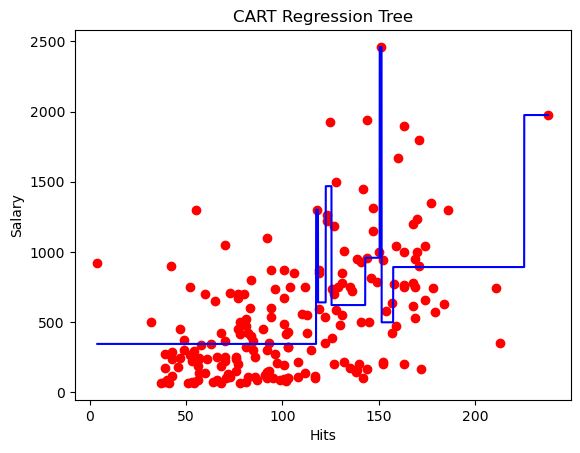

In [87]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
plt.title('CART Regression Tree')  
plt.xlabel('Hits') 
plt.ylabel('Salary') ;

In [88]:
from skompiler import skompile

In [39]:
#!pip install astor

In [40]:
print(skompile(cart_model.predict).to('python/code'))

(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)



PREDICTION

In [41]:
x = [91]

In [42]:
(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)

345.2011551724138

In [43]:
cart_model.predict([[91]])

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([345.20115517])

In [44]:
y_pred = cart_model.predict(X_test)

In [45]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

486.34593105235456

MODEL TUNING

In [90]:
cart_model = DecisionTreeRegressor(max_leaf_nodes=10)
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [91]:
np.sqrt(mean_squared_error(y_test, y_pred))

450.02024012019865

In [92]:
params = {"min_samples_split": range(2, 100, 1), "max_leaf_nodes": range(2, 10, 1)}

In [93]:
from sklearn.model_selection import GridSearchCV
cart_cv_model = GridSearchCV(cart_model, params, cv=10)

In [95]:
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(max_leaf_nodes=10),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [96]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 37}

In [97]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=37)

In [98]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=37)

In [99]:
y_pred_tuned = cart_tuned.predict(X_test)

In [100]:
np.sqrt(mean_squared_error(y_test, y_pred_tuned))

376.39788207109865